* Collection, cleaning and preparing data for this analisys you can find [here](./collecting_data_for_eda.md)
* Correlation coefficients for the features from the insights you can find [here](./high_correlation.md)

Here, on this page, I would like to show you some insights I found in the data about amsterdammers. Let's go:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as Markdown, display

data = pd.read_csv("wijkbuurtkaart_for_eda.csv") 

## Married couples with children in Amsterdam often also have a house and a car. 
### And mostly live outside a city centre close to other families with children.

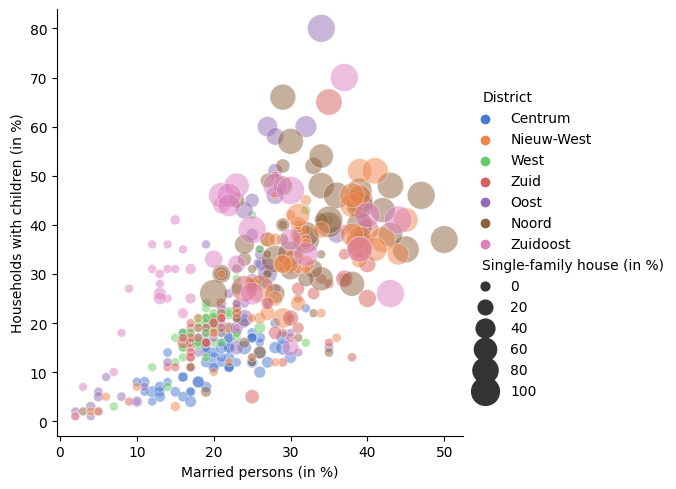

In [2]:
new_data = data[data["percentage_gehuwd"] > 0]
new_data = new_data[new_data["percentage_huishoudens_met_kinderen"] > 0]
new_data = new_data.rename(columns={'stadsdeel': 'District', 'percentage_eengezinswoning': 'Single-family house (in %)'})

ax = sns.relplot(data = new_data, x="percentage_gehuwd", y="percentage_huishoudens_met_kinderen", size = "Single-family house (in %)", sizes=(40, 400), alpha=.5, hue="District", palette="muted")
text = ax.set(xlabel='Married persons (in %)', ylabel='Households with children (in %)')


#sns.relplot(data = new_data, x="percentage_gehuwd", y="percentage_huishoudens_met_kinderen", size = "personenautos_per_huishouden", sizes=(40, 400), alpha=.5, hue="stadsdeel", palette="muted")

#plt.show()

## Residents who tend to use a lot of gas also use more electricity.

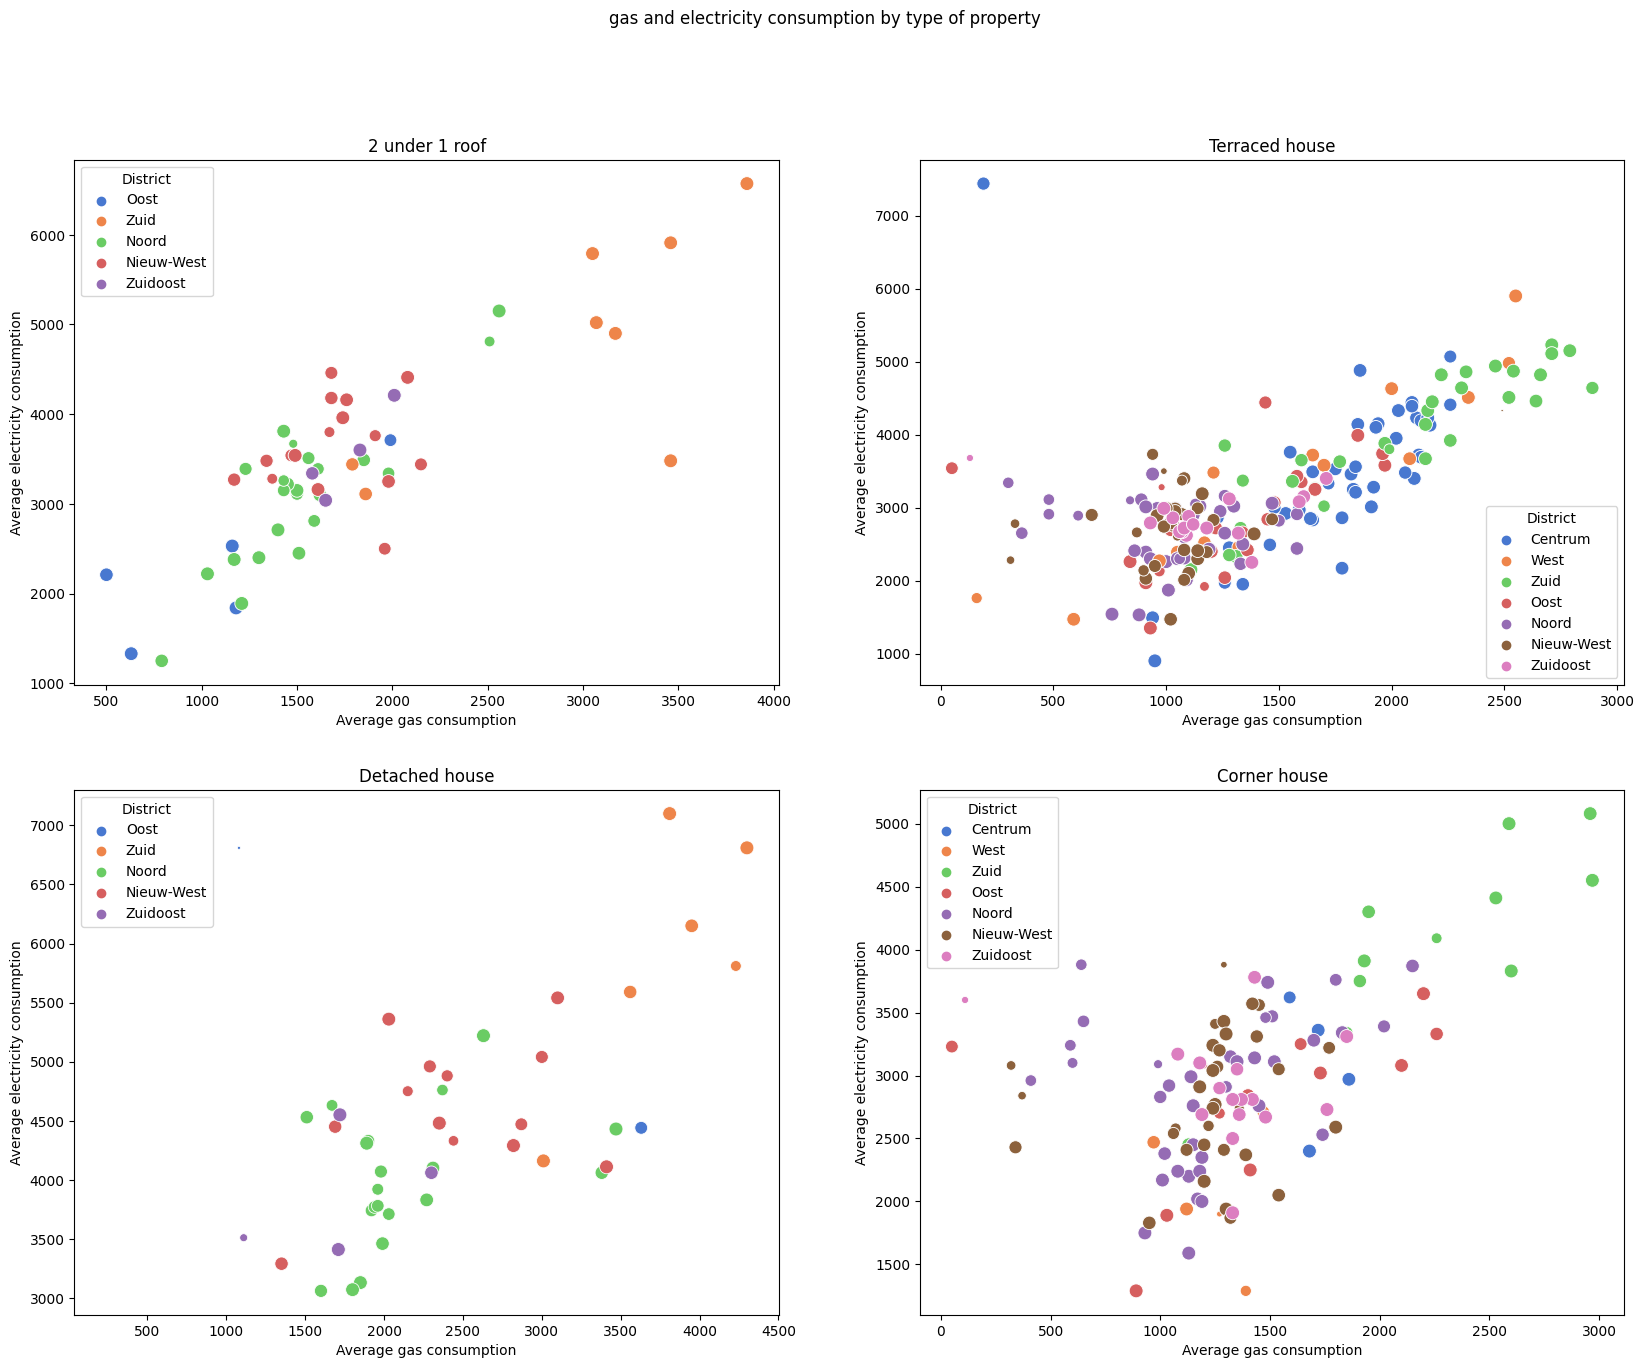

In [3]:
def size_points(gas_data):
    return gas_data["percentage_bouwjaarklasse_tot_2000"]

gas_data = data.copy()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('gas and electricity consumption by type of property')

gas_data = data[data["gemiddeld_gasverbruik_2_onder_1_kap_woning"] > 0]
gas_data = gas_data[gas_data["gem_elektriciteitsverbruik_2_onder_1_kap_woning"] > 0]
gas_data = gas_data.rename(columns={'stadsdeel': 'District'})
ax = sns.scatterplot(ax=axes[0, 0], data=gas_data, 
                x='gemiddeld_gasverbruik_2_onder_1_kap_woning', y='gem_elektriciteitsverbruik_2_onder_1_kap_woning',
                hue="District", s = size_points(gas_data), palette="muted").set(title = '2 under 1 roof')
text = axes[0, 0].set(xlabel='Average gas consumption', ylabel='Average electricity consumption')

gas_data = data[data["gemiddeld_gasverbruik_tussenwoning"] > 0]
gas_data = gas_data[gas_data["gemiddeld_elektriciteitsverbruik_tussenwoning"] > 0]
gas_data = gas_data.rename(columns={'stadsdeel': 'District'})
ax = sns.scatterplot(ax=axes[0, 1], data=gas_data, 
                x='gemiddeld_gasverbruik_tussenwoning', y='gemiddeld_elektriciteitsverbruik_tussenwoning',
                hue="District", s = size_points(gas_data), palette="muted").set(title='Terraced house')
text = axes[0, 1].set(xlabel='Average gas consumption', ylabel='Average electricity consumption')

gas_data = data[data["gemiddeld_gasverbruik_vrijstaande_woning"] > 0]
gas_data = gas_data[gas_data["gem_elektriciteitsverbruik_vrijstaande_woning"] > 0]
gas_data = gas_data.rename(columns={'stadsdeel': 'District'})
ax = sns.scatterplot(ax=axes[1, 0], data=gas_data, 
                x='gemiddeld_gasverbruik_vrijstaande_woning', y='gem_elektriciteitsverbruik_vrijstaande_woning',
                hue="District", s = size_points(gas_data), palette="muted").set(title='Detached house')
text = axes[1, 0].set(xlabel='Average gas consumption', ylabel='Average electricity consumption')

gas_data = data[data["gemiddeld_gasverbruik_hoekwoning"] > 0]
gas_data = gas_data[gas_data["gemiddeld_elektriciteitsverbruik_hoekwoning"] > 0]
gas_data = gas_data.rename(columns={'stadsdeel': 'District'})
ax = sns.scatterplot(ax=axes[1, 1], data=gas_data, 
                x='gemiddeld_gasverbruik_hoekwoning', y='gemiddeld_elektriciteitsverbruik_hoekwoning',
                hue="District", s = size_points(gas_data), palette="muted").set(title='Corner house')
text = axes[1, 1].set(xlabel='Average gas consumption', ylabel='Average electricity consumption')



## Residents who earns more, tends to use electricity more.

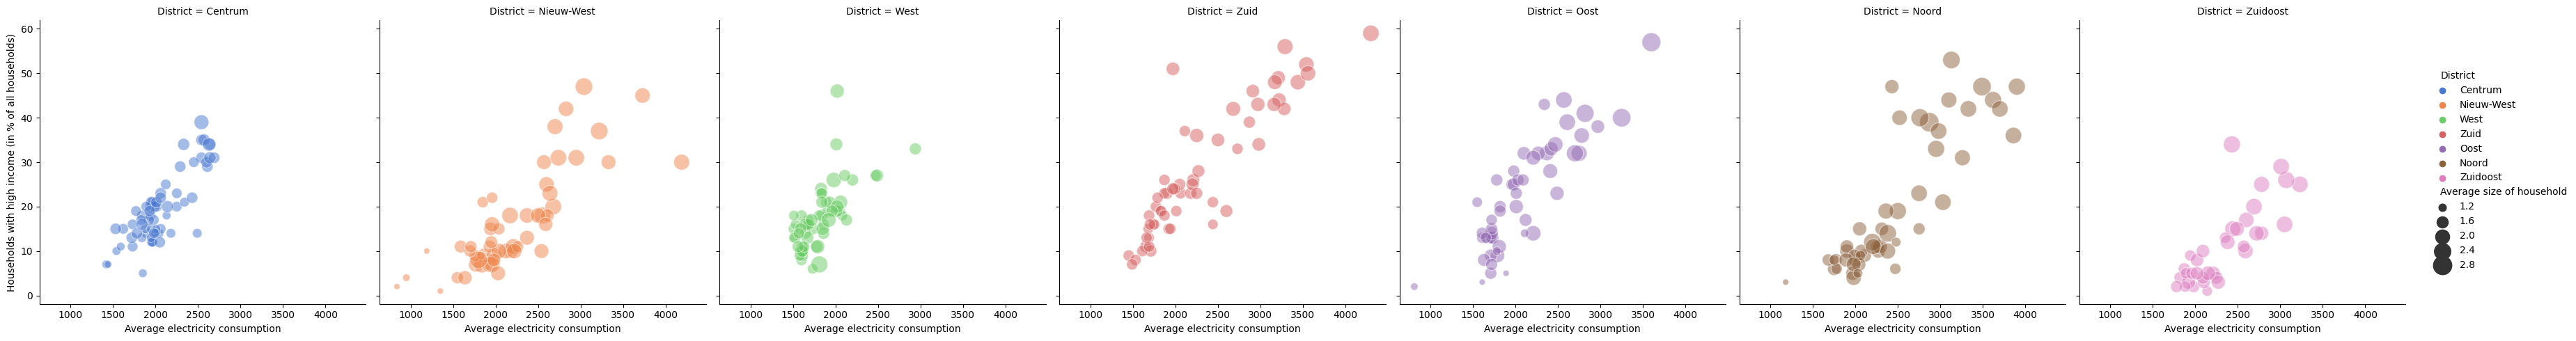

In [4]:
new_data = data[data["percentage_huishoudens_met_hoog_inkomen"] > 0]
new_data = new_data[new_data["gemiddeld_elektriciteitsverbruik_totaal"] > 0]
new_data = new_data.rename(columns={'stadsdeel': 'District', 'gemiddelde_huishoudsgrootte': 'Average size of household'})
ax = sns.relplot(data = new_data, 
            x="gemiddeld_elektriciteitsverbruik_totaal", 
            y="percentage_huishoudens_met_hoog_inkomen", 
            size = "Average size of household",
            sizes=(40, 400), 
            alpha=.5,
            col = 'District',
            hue="District", 
            palette="muted")
text = ax.set(xlabel='Average electricity consumption', ylabel='Households with high income (in % of all households)')


## Self-employed residents earn more and live in the more expensive houses then employees.

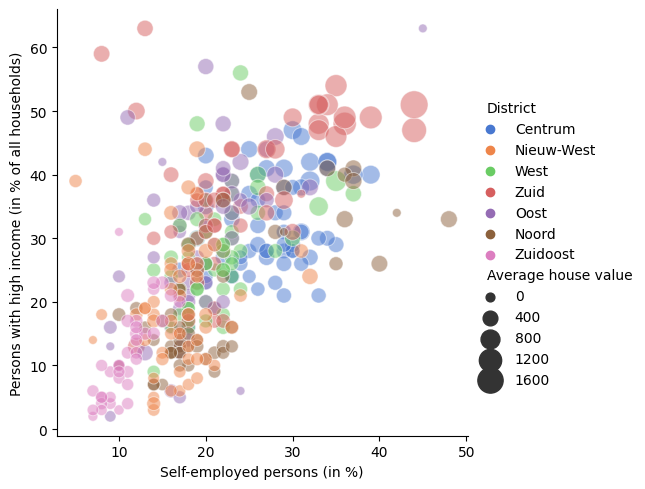

In [5]:
new_data = data.copy()
new_data = new_data[new_data["percentage_personen_met_hoog_inkomen"] > 0]
new_data = new_data[new_data["percentage_zelfstandigen"] > 0]
new_data = new_data.rename(columns={'stadsdeel': 'District', 'gemiddelde_woningwaarde': 'Average house value'})
ax = sns.relplot(data = new_data, 
            x="percentage_zelfstandigen", 
            y="percentage_personen_met_hoog_inkomen", 
            size = "Average house value", 
            sizes=(40, 400), alpha=.5, 
            hue="District", palette="muted")
text = ax.set(xlabel='Self-employed persons (in %)', ylabel='Persons with high income (in % of all households)')



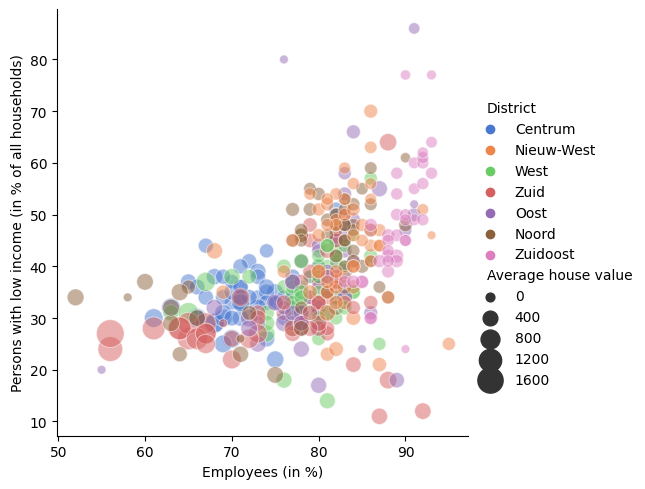

In [6]:
new_data = new_data[new_data["percentage_personen_met_laag_inkomen"] > 0]
new_data = new_data[new_data["percentage_werknemers"] > 0]
new_data = new_data.rename(columns={'stadsdeel': 'District',  'gemiddelde_woningwaarde': 'Average house value'})
ax = sns.relplot(data = new_data, 
                 x="percentage_werknemers", 
                 y="percentage_personen_met_laag_inkomen", 
                 size = "Average house value", 
                 sizes=(40, 400), alpha=.5, 
                 hue="District", palette="muted")


text = ax.set(xlabel='Employees (in %)', ylabel='Persons with low income (in % of all households)')


## People with the same migration expirience choose to live in the same areas

### Moroccans and Turks also live close by in Amsterdam.
Most of them also live in Nieuw-West, usually with kids.

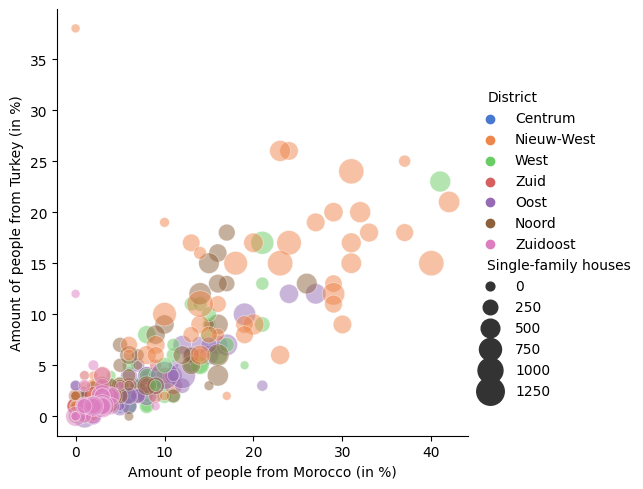

In [7]:
new_data = data.rename(columns={'stadsdeel': 'District',  'huishoudens_met_kinderen': 'Single-family houses'})
ax = sns.relplot(data=new_data,
                 x="percentage_uit_marokko", 
                 y="percentage_uit_turkije", 
                 size = "Single-family houses", 
                 sizes=(40, 400), alpha=.5, 
                 hue="District", 
                 palette="muted")

text = ax.set(xlabel='Amount of people from Morocco (in %)', ylabel='Amount of people from Turkey (in %)')


### People who moved from Surinam, Antillies and Arube live close to each other:
Also from the chart below you can see that most of them live in the Zuidoost district.

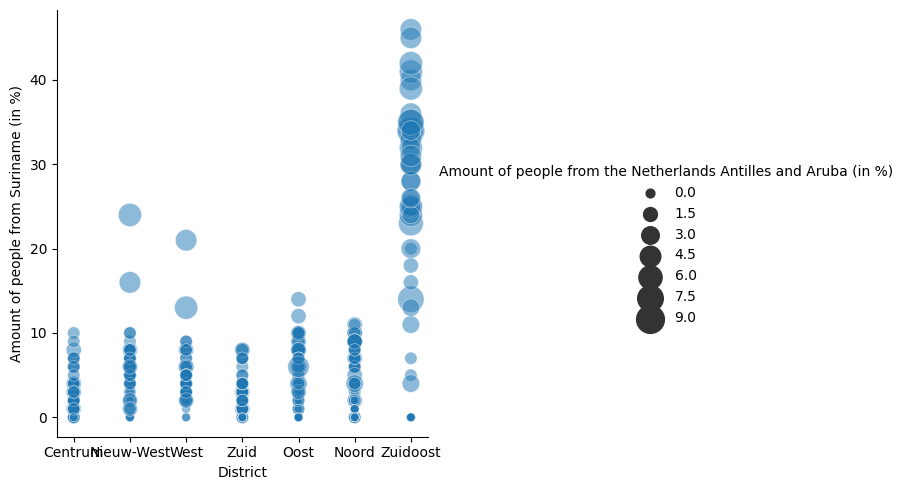

In [8]:

new_data = data.rename(columns={'percentage_uit_nederlandse_antillen_en_aruba': 'Amount of people from the Netherlands Antilles and Aruba (in %)'})
ax = sns.relplot(x="stadsdeel", 
                 y="percentage_uit_suriname", 
                 size = "Amount of people from the Netherlands Antilles and Aruba (in %)", 
                 sizes=(40, 400), alpha=.5, data=new_data)

text = ax.set(xlabel='District', ylabel='Amount of people from Suriname (in %)')



### There is quite big differentiation in where dutch people, people with western and non-western migration background live.

##### And it looks like native dutch people doesn't like to live next to the people with the non-western migration expirience. 

On the plots below we can see that in different Amsterdam districts we can meet different kind of people:

In [9]:
migration_data = data[data['perc_mensen_van_nederland'] != 100]
migration_data = migration_data[migration_data['percentage_niet_westerse_migratieachtergrond'] != 0]
migration_data = migration_data[migration_data['percentage_westerse_migratieachtergrond'] != 0]

In [10]:

non_western_mean_centrum = migration_data[migration_data['stadsdeel'] == "Centrum"]['percentage_niet_westerse_migratieachtergrond'].mean()
display(Markdown("- Quite small amount of people with non-Western migration expirience (around **{:.1f}%** of the neighbourhood population in average) live in the **Centrum** district.".format(non_western_mean_centrum)))

non_western_mean_zuid = migration_data[migration_data['stadsdeel'] == "Zuid"]['percentage_niet_westerse_migratieachtergrond'].mean()
display(Markdown("- Same with **Zuid** district - only around **{:.1f}%** of the neighbourhood population are non-Western people (in average).".format(non_western_mean_zuid)))

non_western_mean_west = migration_data[migration_data['stadsdeel'] == "West"]['percentage_niet_westerse_migratieachtergrond'].mean()
western_mean_west = migration_data[migration_data['stadsdeel'] == "West"]['percentage_westerse_migratieachtergrond'].mean()
dutch_mean_west = migration_data[migration_data['stadsdeel'] == "West"]['perc_mensen_van_nederland'].mean()
display(Markdown("- **West** is chosen more often by the people with non-Western migrantion background: in average **{:.1f}%** of the neighbourhood population, compare to around **{:.1f}%** of the people with the background from western countries. But most of the residents in the neighbourhoods (around **{:.1f}%**) are still Dutch, with inverse proportion to non-Western people".format(non_western_mean_west, western_mean_west, dutch_mean_west)))

western_mean_noord = migration_data[migration_data['stadsdeel'] == "Noord"]['percentage_westerse_migratieachtergrond'].mean()
western_mean_oost = migration_data[migration_data['stadsdeel'] == "Oost"]['percentage_westerse_migratieachtergrond'].mean()
display(Markdown("- For the **Noord** and **Oost** districts we can see similar cases: relatively small amount of the people with western migration backgrounds (**{:.1f}%** and **{:.1f}%** of the neighbourhood population respectively) and the number of Dutch is also inversely proportional to the number of non-Western migrants. As many dutchmans live in the neighbourhood, as less people from Morocco you can meet there, according to the pictures below.".format(western_mean_noord,western_mean_oost)))

display(Markdown("- **Nieuw West** looks more mixed: there is still inverse proportion relationship between Dutch and non-Western people, but they are much more evenly distributed among the area."))

non_western_mean_zuidoost = migration_data[migration_data['stadsdeel'] == "Zuidoost"]['percentage_niet_westerse_migratieachtergrond'].median()
western_mean_zuidoost = migration_data[migration_data['stadsdeel'] == "Zuidoost"]['percentage_westerse_migratieachtergrond'].median()
dutch_mean_zuidoost = migration_data[migration_data['stadsdeel'] == "Zuidoost"]['perc_mensen_van_nederland'].median()

display(Markdown("- Pictures of the **Zuidoost** district shows us that relatively small amount of Duchman of people from Western countries chooses this district to live in. Most often only **{:.1f}%** and **{:.1f}%** are Dutch and Western people, compare to **{:.1f}%** of non-Western people in the neighbourhood population.".format(dutch_mean_zuidoost, western_mean_zuidoost, non_western_mean_zuidoost)))


- Quite small amount of people with non-Western migration expirience (around **16.3%** of the neighbourhood population in average) live in the **Centrum** district.

- Same with **Zuid** district - only around **18.5%** of the neighbourhood population are non-Western people (in average).

- **West** is chosen more often by the people with non-Western migrantion background: in average **29.0%** of the neighbourhood population, compare to around **20.7%** of the people with the background from western countries. But most of the residents in the neighbourhoods (around **50.2%**) are still Dutch, with inverse proportion to non-Western people

- For the **Noord** and **Oost** districts we can see similar cases: relatively small amount of the people with western migration backgrounds (**14.2%** and **18.9%** of the neighbourhood population respectively) and the number of Dutch is also inversely proportional to the number of non-Western migrants. As many dutchmans live in the neighbourhood, as less people from Morocco you can meet there, according to the pictures below.

- **Nieuw West** looks more mixed: there is still inverse proportion relationship between Dutch and non-Western people, but they are much more evenly distributed among the area.

- Pictures of the **Zuidoost** district shows us that relatively small amount of Duchman of people from Western countries chooses this district to live in. Most often only **22.0%** and **11.0%** are Dutch and Western people, compare to **67.0%** of non-Western people in the neighbourhood population.

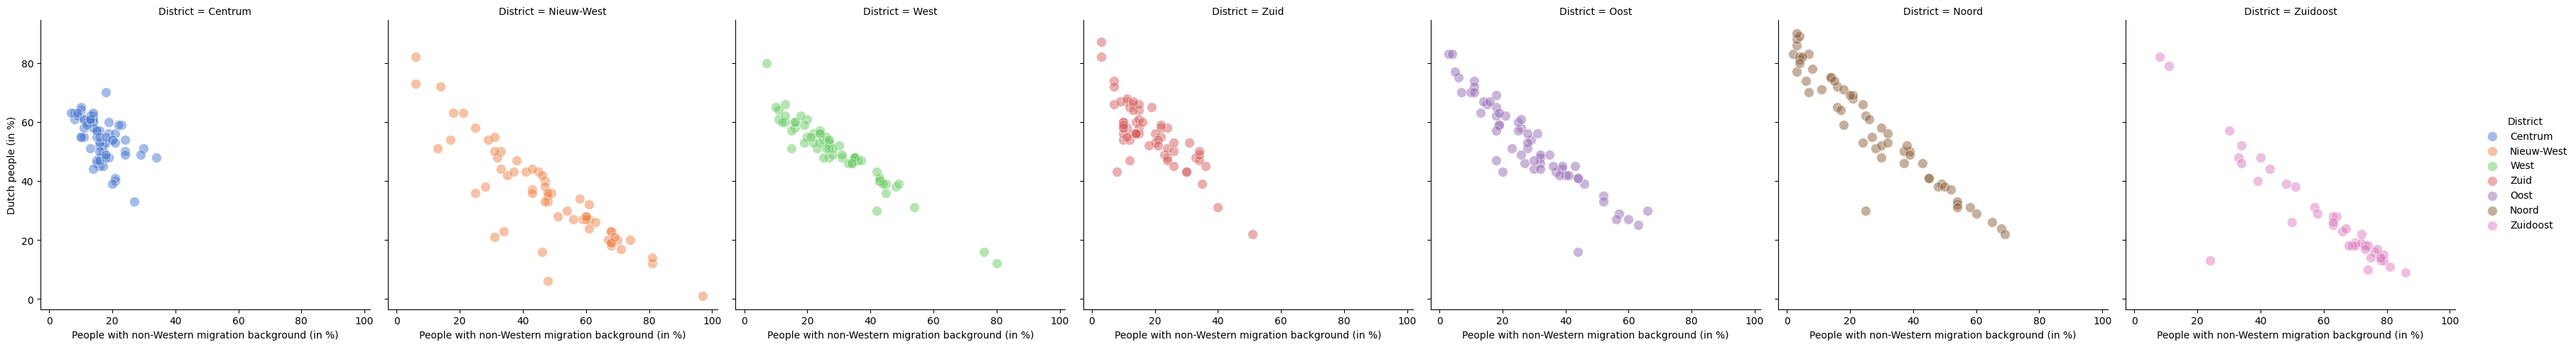

In [11]:
migration_data = migration_data.rename(columns={'stadsdeel': 'District'})
g = sns.FacetGrid(migration_data, col="District", hue="District", palette="muted", height=5)
g.map(sns.scatterplot, "percentage_niet_westerse_migratieachtergrond", "perc_mensen_van_nederland", s=100, alpha=.5)
g.set_xlabels("People with non-Western migration background (in %)")
g.set_ylabels("Dutch people (in %)")
_ = g.add_legend()

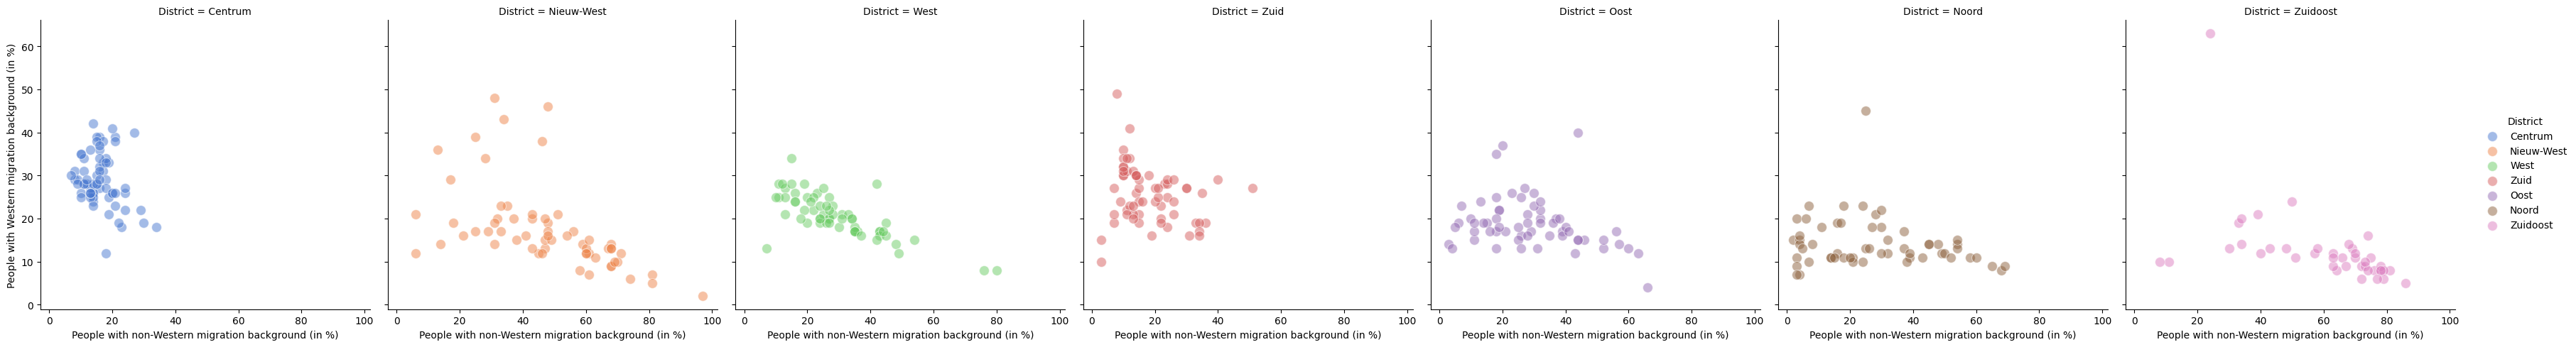

In [12]:
g = sns.FacetGrid(migration_data, col="District", hue="District", palette="muted", height=5)
g.map(sns.scatterplot, "percentage_niet_westerse_migratieachtergrond", "percentage_westerse_migratieachtergrond", s=100, alpha=.5)
g.set_xlabels("People with non-Western migration background (in %)")
g.set_ylabels("People with Western migration background (in %)")
_ = g.add_legend()

## People from non-Western countries often rent a houses from housing corporation, but people with Western migration background lke to rent from other kind of property owners.  

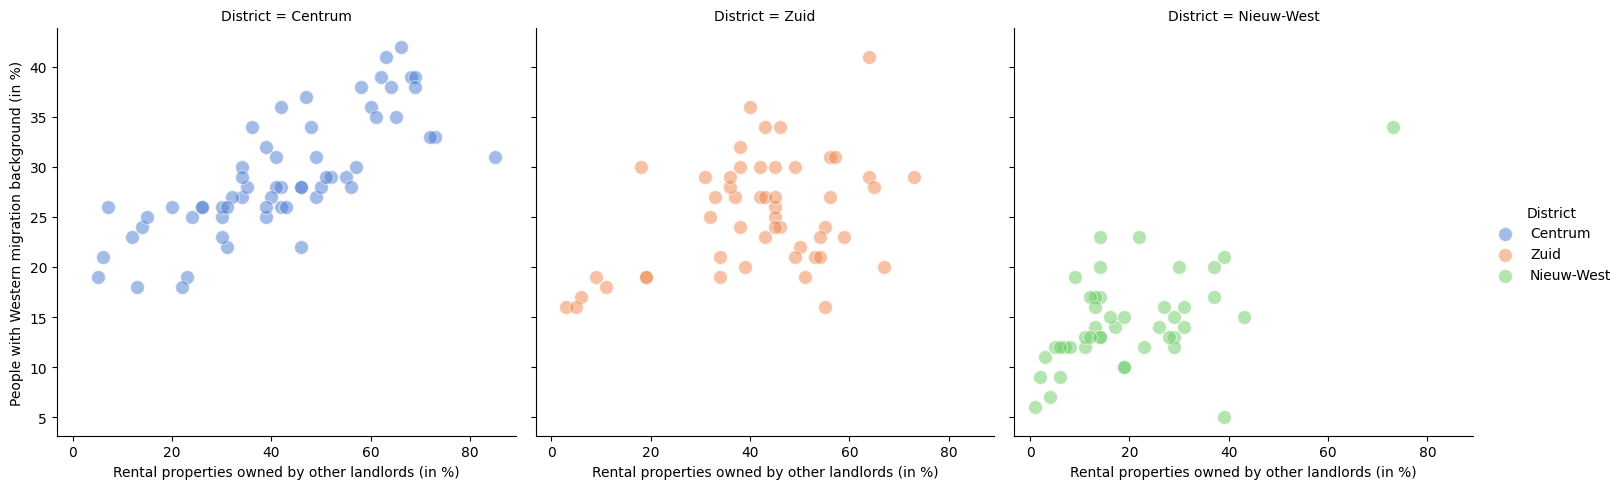

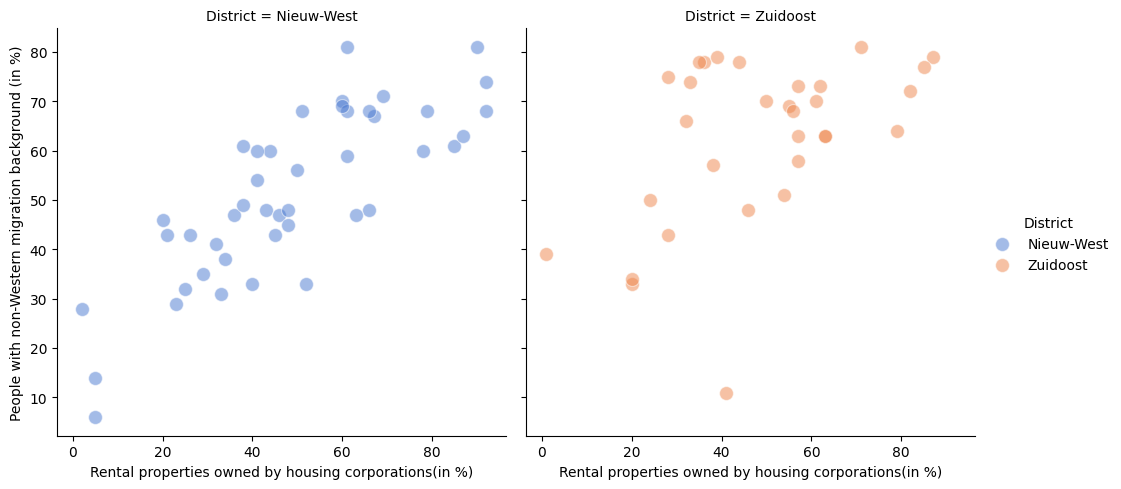

In [13]:
new_data = data[data['perc_huurwoningen_in_bezit_overige_verhuurders'] != 0]
new_data = new_data[new_data['perc_huurwoningen_in_bezit_overige_verhuurders'] != 100]
new_data = new_data[new_data['perc_huurwoningen_in_bezit_woningcorporaties'] != 0]
new_data = new_data.rename(columns={'stadsdeel': 'District'})


g = sns.FacetGrid(new_data[new_data['District'].isin(['Nieuw-West', 'Zuid', 'Centrum'])], col="District", hue="District", palette="muted", height=5)
g.map(sns.scatterplot, "perc_huurwoningen_in_bezit_overige_verhuurders", "percentage_westerse_migratieachtergrond", s=100, alpha=.5)
g.set_xlabels("Rental properties owned by other landlords (in %)")
g.set_ylabels("People with Western migration background (in %)")
g.add_legend()

g = sns.FacetGrid(new_data[new_data['District'].isin(['Nieuw-West', 'Zuidoost'])], col="District", hue="District", palette="muted", height=5)
g.map(sns.scatterplot, "perc_huurwoningen_in_bezit_woningcorporaties", "percentage_niet_westerse_migratieachtergrond", s=100, alpha=.5)
g.set_xlabels("Rental properties owned by housing corporations(in %)")
g.set_ylabels("People with non-Western migration background (in %)")
_ = g.add_legend()
